# Исследование объявлений о продаже квартир

Исходные данные — архив объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Часть данных сформированы пользователемя, другая часть — получены автоматически на основе картографических данных.

**Задача**

Установить параметры для определения рыночной стоимости объектов недвижимости.

## Изучение общей информации.

In [2]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

In [7]:
# чтение данных
data = pd.read_csv("datasets/real_estate_data.csv", sep= '\t')


'Информация о данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

'\n'

'Статистические показатели данных:'

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


'\n'

'Все столбцы данных:'

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


'\n'

Дубликатов не найдено.


'Гистограмма данных:'

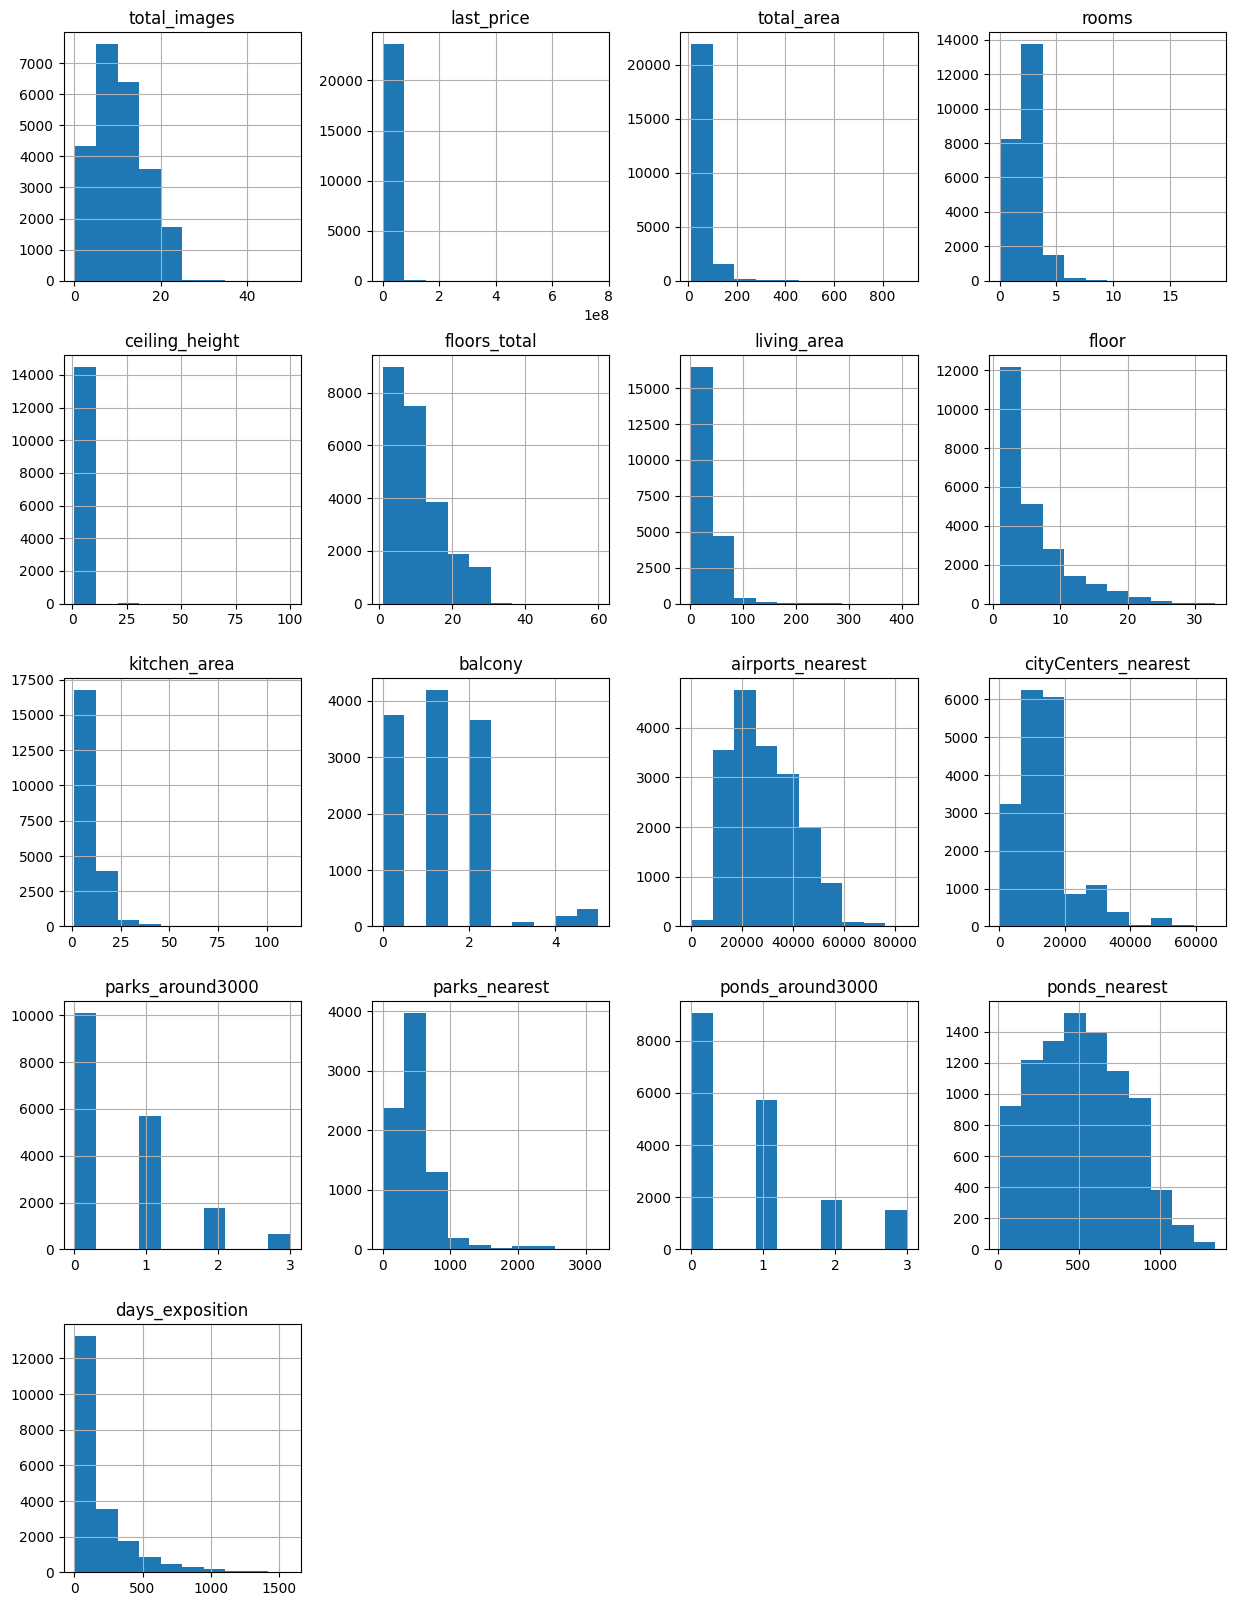

In [123]:
def data_analysis(data):
    """
    Функция для вывода первичной информации

    Параметры:
    data (DataFrame): DataFrame, который требуется проанализировать.

    Возвращает:
    None
    """
    # Вывод основной информации о данных
    display("Информация о данных:")
    display(data.info())
    display("\n")
    
    # Вывод основных статистических показателей данных
    display("Статистические показатели данных:")
    display(data.describe())
    display("\n")
    
    # Вывод всех столбцов
    display("Все столбцы данных:")
    display(data)
    display("\n")
    
    # Поиск и вывод дубликатов
    duplicated_rows = data[data.duplicated()]
    if not duplicated_rows.empty:
        print("Найдены дубликаты:")
        print(duplicated_rows)
        print("\n")
    else:
        print("Дубликатов не найдено.")

    # Вывод гистограммы для всех столбцов
    display("Гистограмма данных:")
    data.hist(figsize=(15, 20))
        
data_analysis(data)


**Вывод**

 - Файл с данными содержит 22 столбца (2 булевых, 3 целочисленных, 14 столбцов с плавающей точкой и 3 столбца с объектами) и 23699 записей;
 - Большинство названий столбцов выглядят адекватно и не содержат изъянов, но столбцы cityCenters_nearest, parks_around3000, ponds_around3000 и is_apartment имеют названия, несколько выбивающиеся из стандартного стиля;
 - В 14 из 22 столбцов есть пропущенные значения;
 - В столбцах last_price, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest и days_exposition, судя по данным, все значения являются целыми числами. Эту гипотезу будет необходимо проверить на следующем шаге;
 - Столбец first_day_exposition содержит даты. На следующем шаге необходимо будет перевести его к типу datetime;
 - В столбце floors_total, судя по данным и логике (в здании не может быть дробного значения количества этажей), все значения должны быть целыми числами. На следующем шаге столбец нужно будет привести к типу int;
 - В столбце balcony, судя по данным и логике (в квартире не может быть дробного значения количества балконов), все значения должны быть целыми числами. На следующем шаге столбец нужно будет привести к типу int;
 - В столбце airports_nearest, судя по данным, все значения являются целыми числами. Эту гипотезу будет необходимо проверить на следующем шаге;
 - В столбце rooms минимальным значением является 0 комнат. Данное значение не является возможным. Данную аномалию необходимо проверить на следующем шаге;
 - В столбце ceiling_height максимальным значением является 100 м, минимальным 0 м. Это неестественные значения для данного показателя. Данные аномалии необходимо проверить на следующем шаге;
 - В столбце airports_nearest минимальным значением является 0 м. Это достаточно странно, так как получается, что продается квартира на территории аэропорта. Данную аномалию необходимо проверить на следующем шаге.

## Предобработка данных

### Переименование столбцов

In [8]:
# Вывод списка столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
# Переименование столбцов
data = data.rename(columns={
    "cityCenters_nearest": "city_сenters_nearest",
    "parks_around3000": "parks_around_3000",
    "ponds_around3000": "ponds_around_3000",
    "is_apartment": "apartment", "floor": "floor_"
})

In [10]:
# Проверка результатов переименования
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor_',
       'apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Проверка на пропуски и аномалии, изменение типов данных

#### Проверка столбца total_images

In [127]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37], dtype=int64)

#### Изменение типа столбца last_price

In [128]:
# Проверка наличия дробных частей цены
len(data.query('last_price % 1 != 0'))

0

In [129]:
# Приведение к целочисленному типу
data['last_price'] = data['last_price'].astype('int')

# Проверка результатов приведения
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int32

#### Удаление аномалий в столбце total_area

In [130]:
# Вывод основных статистических показателей столбца
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [131]:
# Проверка наличия дробных значений с коррекцией двоичного представления чисел
len(data.query('total_area % 1 > 1e-10'))

11249

<Axes: >

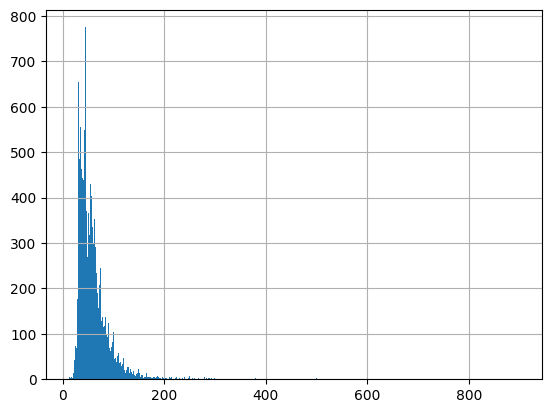

In [132]:
# Визуальная оценка распределения данных
data['total_area'].hist(bins=900)

<Axes: >

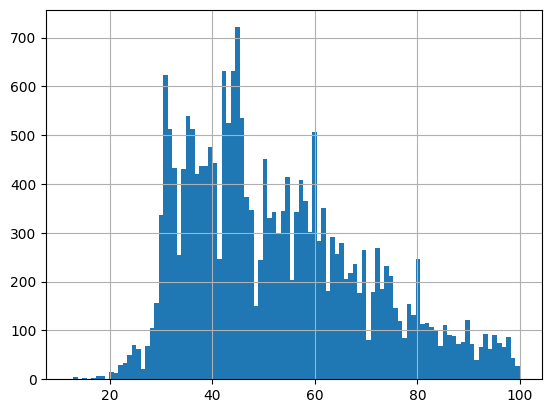

In [133]:
# Визуальная оценка распределения основной части данных
data.query('total_area < 100')['total_area'].hist(bins=100)

In [134]:
# Подсчет количества квартир с площадью менее 28 м^2
len(data.query('total_area < 28'))

392

In [135]:
# Удаление квартир с площадью менее 28 м^2 и более 200 м^2
data = data.query('28 <= total_area <= 200').reset_index(drop=True)

# Проверка результатов удаления
print(len(data.query('total_area < 28')))
print(len(data.query('total_area > 200')))

0
0


#### Изменение типа столбца first_day_exposition

In [136]:
# Оценка содержания данных
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [137]:
# Приведение данных к типу datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Проверка результатов
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23075   2017-03-21
23076   2018-01-15
23077   2018-02-11
23078   2017-03-28
23079   2017-07-21
Name: first_day_exposition, Length: 23080, dtype: datetime64[ns]

#### Удаление аномалий в столбце rooms

In [138]:
# Проверка значений столбца
data['rooms'].value_counts()

rooms
2     7936
1     7790
3     5799
4     1140
5      265
0       64
6       62
7       20
11       2
8        2
Name: count, dtype: int64

<Axes: >

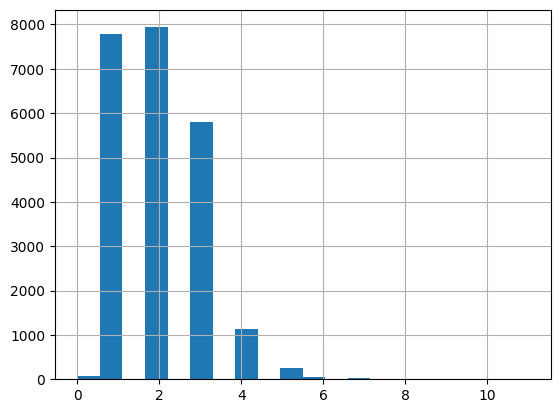

In [139]:
# Визуальная оценка распределения данных
data['rooms'].hist(bins=20)

In [140]:
# Подсчет количества квартир с 0 комантами
len(data[data['rooms'] == 0])

64

<Axes: >

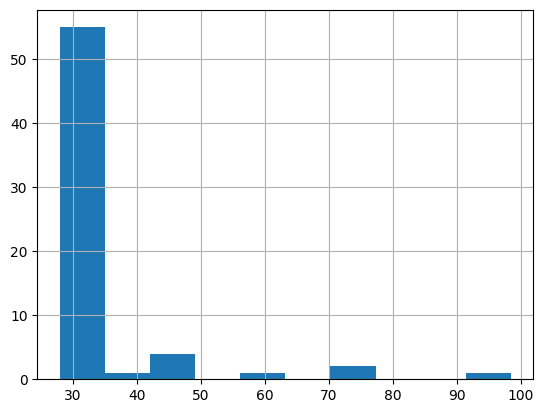

In [141]:
# Оценка площади квартир с 0 комнат
data.query('rooms == 0')['total_area'].hist()

In [142]:
# Замена количества комнат с 0 на 1
data.loc[data['rooms'] == 0, 'rooms'] = 1

In [143]:
# Проверка результатов замены
data['rooms'].value_counts()

rooms
2     7936
1     7854
3     5799
4     1140
5      265
6       62
7       20
11       2
8        2
Name: count, dtype: int64

#### Удаление и исправление аномалий в столбце ceiling_height

In [144]:
# Функция для вывода доли пропущенных значений в столбце
# column_name - (string) Название столбца
def get_missing_values_proportion(column_name):
    length = len(data.query(column_name + '.isnull()'))

    print('Пропущенных значений - {} ({:.2%})'.format(length, length / len(data)), sep='')

In [145]:
# Оценка количества пропущенных значений
get_missing_values_proportion('ceiling_height')

Пропущенных значений - 8879 (38.47%)


In [146]:
# Вывод основных статистических показателей столбца
data['ceiling_height'].describe()

count    14201.000000
mean         2.756819
std          0.953399
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

<Axes: >

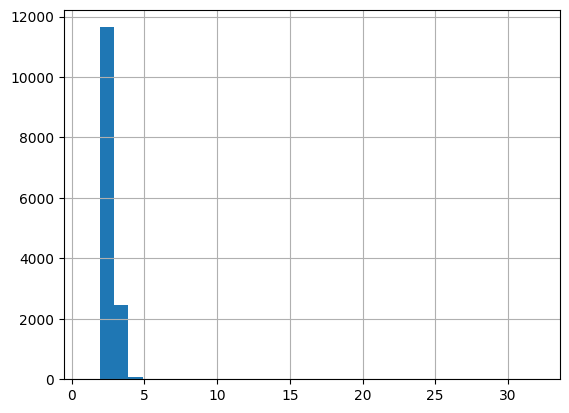

In [147]:
# Визуальная оценка распределения данных
data['ceiling_height'].hist(bins=32)

<Axes: >

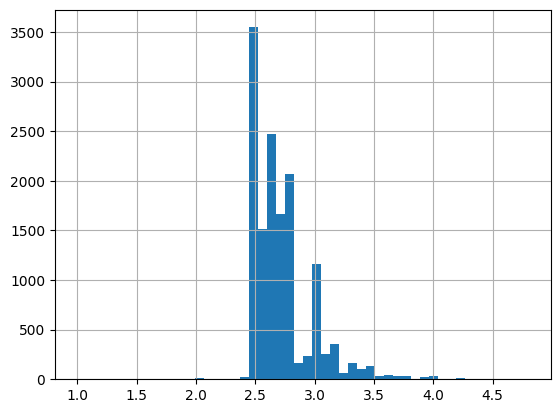

In [148]:
# Визуальная оценка распределения основной части данных
data.query('ceiling_height < 5')['ceiling_height'].hist(bins=50)

<Axes: >

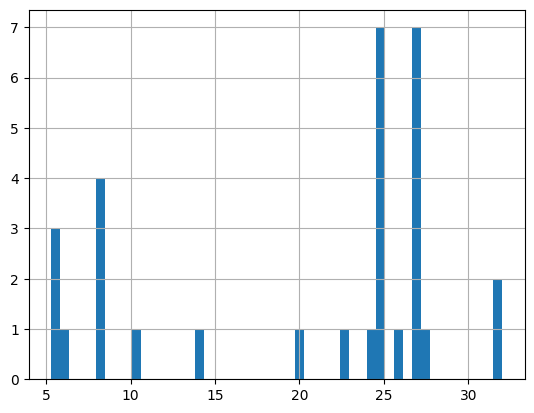

In [149]:
# Визуальная оценка распределения данных с аномально большими значениями
data.query('ceiling_height > 5')['ceiling_height'].hist(bins=50)

In [150]:
# Подсчет количества квартир с аномальными значениями высоты потолка
len(data.query('ceiling_height < 2.5 or ceiling_height > 5'))

102

In [151]:
# Исправление значений у квартир с выстой потолка более и равной 25 м
data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] /= 10

<Axes: >

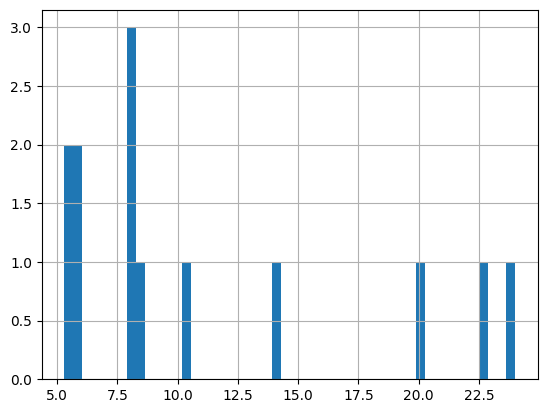

In [152]:
# Проверка результатов исправления
data.query('5 < ceiling_height < 40')['ceiling_height'].hist(bins=50)

<Axes: >

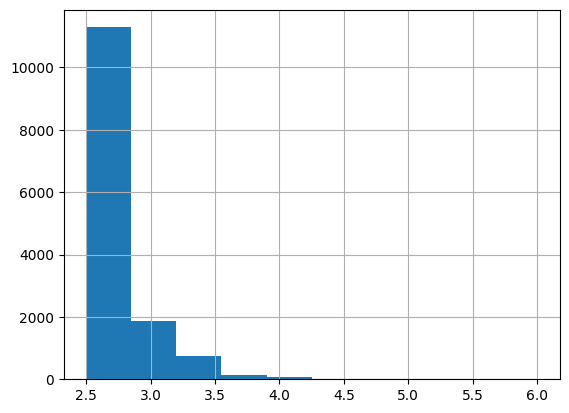

In [153]:
# Удаление аномальных значений
data = data.query('2.5 <= ceiling_height < 7.5 or ceiling_height.isnull()').reset_index(drop=True)

# Проверка результатов удаления
data['ceiling_height'].hist()

In [154]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('ceiling_height')

Пропущенных значений - 8879 (38.60%)


#### Удаление пропусков и изменение типа столбца floors_total

In [155]:
# Проверка значений столбца
data['floors_total'].value_counts()

floors_total
5.0     5648
9.0     3717
16.0    1341
12.0    1334
4.0     1160
10.0    1159
25.0    1031
6.0      855
17.0     808
3.0      642
7.0      567
14.0     537
18.0     479
24.0     439
8.0      368
2.0      361
15.0     354
23.0     341
19.0     314
22.0     274
20.0     266
13.0     228
11.0     199
27.0     158
21.0     146
26.0     124
1.0       23
35.0      22
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
Name: count, dtype: int64

In [156]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('floors_total')

Пропущенных значений - 76 (0.33%)


In [157]:
# Проверка гипотезы о том, что количество этажей не указано, когда в доме 1 этаж
data.query('floors_total.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor_,apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
183,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
232,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
449,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
652,4,6051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1697,5,3600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21875,5,8500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
21984,4,4574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22133,0,14569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
22893,0,21187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [158]:
# Удаление записей с пропущенными значениями
data.dropna(subset=['floors_total'], inplace=True)
data = data.reset_index(drop=True)

# Проверка результатов удаления
get_missing_values_proportion('floors_total')

Пропущенных значений - 0 (0.00%)


In [159]:
# Приведение к целочисленному типу
data['floors_total'] = data['floors_total'].astype('int')

# Проверка результатов приведения
data['floors_total']

0        16
1        11
2         5
3        14
4        14
         ..
22919     5
22920     5
22921     3
22922    17
22923     5
Name: floors_total, Length: 22924, dtype: int32

#### Заполнение пропусков и смена типа столбца apartment

In [160]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('apartment')

# Оценка распределения значений
data['apartment'].value_counts()

Пропущенных значений - 20224 (88.22%)


apartment
False    2655
True       45
Name: count, dtype: int64

In [161]:
# Замена пропущенных значений
data['apartment'] = data['apartment'].fillna(False)

# Проверка результатов замены
data['apartment'].value_counts()

C:\Users\marganov_aleksei\AppData\Local\Temp\ipykernel_4300\3475156095.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['apartment'] = data['apartment'].fillna(False)


apartment
False    22879
True        45
Name: count, dtype: int64

In [162]:
# Приведение к булевому типу
data['apartment'] = data['apartment'].astype('bool')

# Проверка результатов приведения
data['apartment']

0        False
1        False
2        False
3        False
4        False
         ...  
22919    False
22920    False
22921    False
22922    False
22923    False
Name: apartment, Length: 22924, dtype: bool

#### Проверка столбца studio

In [163]:
data['studio'].value_counts()

studio
False    22875
True        49
Name: count, dtype: int64

#### Проверка столбца open_plan

In [164]:
data['open_plan'].value_counts()

open_plan
False    22897
True        27
Name: count, dtype: int64

#### Удаление пропусков в столбце locality_name, создание столбца clean_locality_name без дубликатов, категоризация типов населенных пунктов, создание цифровых представлений названий и типов населенных пунктов

In [165]:
# Проверка значений столбца
data['locality_name'].value_counts()

locality_name
Санкт-Петербург                                      15208
посёлок Мурино                                         463
посёлок Шушары                                         431
Всеволожск                                             389
Пушкин                                                 360
                                                     ...  
посёлок при железнодорожной станции Приветнинское        1
поселок Гладкое                                          1
посёлок городского типа Рябово                           1
поселок городского типа Рябово                           1
посёлок Дзержинского                                     1
Name: count, Length: 359, dtype: int64

In [166]:
# Подсчет количества пустых значений
get_missing_values_proportion('locality_name')

Пропущенных значений - 48 (0.21%)


In [167]:
# Удаление пусты значений
data.dropna(subset=['locality_name'], inplace=True)
data = data.reset_index(drop=True)

# Проверка результатов удаления
get_missing_values_proportion('locality_name')

Пропущенных значений - 0 (0.00%)


In [168]:
# Подсчет уникальных населенных пунктов
len(data['locality_name'].unique())

359

In [11]:
from pymystem3 import Mystem

m = Mystem()

ModuleNotFoundError: No module named 'pymystem3'

In [115]:
# Функция для очистки названий насленных пунктов и удаления дубликатов
# name - (string) Название населенного пункта
# возвращает - (string) Очищенное название населенного пункта
def get_clean_locality_name(name):
    splited_name = name.split(' ')

    # Разделение назавания на тип и название насленного пункта
    locality_type = []
    locality_name = []

    name_started = False
    for word in splited_name:
        if word[0].isupper() or word == 'имени':
            name_started = True

        if name_started:
            locality_name.append(word)
        else:
            locality_type.append(word)

    locality_name = ' '.join(locality_name)

    # Если название не имеет типа, то он возвращается
    if len(locality_type) == 0:
        return locality_name

    # Определение типа насленного пункта
    locality_type = m.lemmatize(' '.join(locality_type))

    if 'поселок' in locality_type:
        if 'городской' in locality_type:
            new_type = 'поселок городского типа'
        elif 'станция' in locality_type:
            new_type = 'поселок при железнодорожной станции'
        elif 'коттеджный' in locality_type:
            new_type = 'коттеджный поселок'
        else:
            new_type = 'поселок'
    elif 'деревня' in locality_type:
        new_type = 'деревня'
    elif 'товарищество' in locality_type:
        new_type = 'садовое товарищество'
    elif 'село' in locality_type:
        new_type = 'село'
    else:
        new_type = 'undefined'

    locality_type = ''.join(locality_type)[:-1]

    return new_type + ' ' + locality_name

In [116]:
# Создание столбца clean_locality_name с очищенными названиями населенных пунктов
data['clean_locality_name'] = data['locality_name'].apply(get_clean_locality_name)

In [117]:
# Проверка результатов создания
data['clean_locality_name'].value_counts()

clean_locality_name
Санкт-Петербург           15208
undefined Мурино            489
undefined Шушары            431
Всеволожск                  389
Пушкин                      360
                          ...  
undefined Алексеевка          1
undefined Белоостров          1
деревня Пельгора              1
undefined Каложицы            1
undefined Дзержинского        1
Name: count, Length: 313, dtype: int64

In [118]:
# Функция для получения типа населенного пункта
# name - (string) Название населенного пункта
# возвращает - (string) Тип населенного пункта
def get_clean_locality_type(name):
    splited_name = name.split(' ')

    # Разделение назавания на тип и название насленного пункта
    locality_type = []
    locality_name = []

    name_started = False
    for word in splited_name:
        if word[0].isupper() or word == 'имени':
            name_started = True

        if name_started:
            locality_name.append(word)
        else:
            locality_type.append(word)

    locality_name = ' '.join(locality_name)

    # Если название не имеет типа, то он возвращается
    if len(locality_type) == 0:
        return 'без типа'

    # Определение типа насленного пункта
    locality_type = m.lemmatize(' '.join(locality_type))

    if 'поселок' in locality_type:
        if 'городской' in locality_type:
            new_type = 'поселок городского типа'
        elif 'станция' in locality_type:
            new_type = 'поселок при железнодорожной станции'
        elif 'коттеджный' in locality_type:
            new_type = 'коттеджный поселок'
        else:
            new_type = 'поселок'
    elif 'деревня' in locality_type:
        new_type = 'деревня'
    elif 'товарищество' in locality_type:
        new_type = 'садовое товарищество'
    elif 'село' in locality_type:
        new_type = 'село'
    else:
        new_type = 'undefined'

    locality_type = ''.join(locality_type)[:-1]

    return new_type

In [119]:
# Категоризация данных по типу населенного пункта
data['clean_locality_type'] = data['clean_locality_name'].apply(get_clean_locality_type)

ValueError: I/O operation on closed file

In [ ]:
# Проверка результатов категоризации
data['clean_locality_type'].value_counts()

In [ ]:
# Определение уникальных типов населенных пунктов
unique_types = list(data['clean_locality_type'].unique())

# Функция для получения цифрового представления типа населенного пункта
# type - (string) Тип населенного пункта
# возвращает - (string) Цифровое представления типа населенного пункта
def get_clean_locality_type_number(type):
    return unique_types.index(type)

In [ ]:
# Создание столбца с цифровым представлением типа населенного пункта
data['clean_locality_type_number'] = data['clean_locality_type'].apply(get_clean_locality_type_number)

# Проверка результатов создания
data.groupby('clean_locality_type')['clean_locality_type_number'].value_counts()

In [ ]:
# Определение уникальных названий населенных пунктов
unique_names = list(data['clean_locality_name'].unique())

# Функция для получения цифрового представления названия населенного пункта
# name - (string) Название населенного пункта
# возвращает - (string) Цифровое представления названия населенного пункта
def get_clean_locality_name_number(name):
    return unique_names.index(name)

In [ ]:
# Создание столбца с цифровым представлением названия населенного пункта
data['clean_locality_name_number'] = data['clean_locality_name'].apply(get_clean_locality_name_number)

# Проверка результатов создания
data.groupby('clean_locality_name')['clean_locality_name_number'].value_counts()

#### Удаление аномальных значений в столбце living_area

In [ ]:
# Вывод основных статистических параметров столбца
data['living_area'].describe()

In [ ]:
# Визуальная оценка расперделения значений
data['living_area'].hist(bins=409, figsize=(15, 10))

In [ ]:
# Визуальная оценка распределения значений, меньших 14 м
data.query('living_area < 14')['living_area'].hist(bins=14)

In [ ]:
# Подсчет количества квартир с жилой площадью менее 14 м
len(data.query('living_area < 14'))

In [ ]:
# Удаление записей с жилой площадью менее 14 м
data = data.query('living_area >= 14 or living_area.isnull()').reset_index(drop=True)

# Проверка результатов удаления
len(data.query('living_area < 14'))

In [ ]:
# Подсчет колисества пропущенных значений
get_missing_values_proportion('living_area')

In [ ]:
# Проверка наличия квартир со значением жилой площади, большим, чем значение общей площади
len(data.query('living_area >= total_area'))

#### Проверка столбца floor

In [ ]:
# Вывод основных статистических параметров столбца
data['floor_'].describe()

In [ ]:
# Проверка наличия квартир со этажом, большим, чем общее количество этажей в здании
len(data.query('floor_ > floors_total'))

#### Проверка столбца kitchen_area

In [ ]:
# Вывод основных статистических параметров столбца
data['kitchen_area'].describe()

In [ ]:
# Визуальная оценка расперделения значений
data['kitchen_area'].hist(bins=112, figsize=(15, 10))

In [ ]:
# Проверка наличия квартир со значением площади кухни, большим, чем значение общей площади
len(data.query('kitchen_area >= total_area'))

In [ ]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('kitchen_area')

#### Заполнение пропусков и приведение к целочисленному типу столбца balcony

In [ ]:
# Вывод основных статистических параметров столбца
data['balcony'].describe()

In [ ]:
# Оценка значений столбца
data['balcony'].value_counts()

In [ ]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('balcony')

In [ ]:
# Замена пропущенных значений на 0
data['balcony'] = data['balcony'].fillna(0)

# Проверка результатов замены
get_missing_values_proportion('balcony')

In [ ]:
# Приведение столбца к целочисленному типу
data['balcony'] = data['balcony'].astype('int')

# Проверка результатов приведения
data['balcony']

#### Заполнение пропусков в столбце airports_nearest

In [ ]:
# Вывод основных статистических параметров столбца
data['airports_nearest'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['airports_nearest'].hist(bins=100, figsize=(15, 10))

In [ ]:
# Оценка квартир с аномальным значением расстояния до аэропорта (0) и их количества
data.query('airports_nearest < 4000')

In [ ]:
# Подсчет количества квартир с указанной информацией о расстоянии до ближайшего аэропорта для каждого населенного пункта
airports_nearest_stat = data.pivot_table(index='clean_locality_name', values='airports_nearest', aggfunc='count')

# Подсчет и анализ населенных пунктов, где нет квартир с указанным до аэропорта расстоянием
len(airports_nearest_stat.query('airports_nearest == 0'))

In [ ]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('airports_nearest')

In [ ]:
# Проверка гипотезы, что расстояние до аэропорта в одном населенном пункте будет схожим
(
    data
    .query('clean_locality_name != "Санкт-Петербург"')
    .plot(x='airports_nearest', y='clean_locality_name_number', kind='scatter', figsize=(15, 10))
)

In [ ]:
# Проверка гипотезы, что расстояние до аэропорта внутри Санкт-Петербурга будет иметь значительный размах
(
    data
    .query('clean_locality_name == "Санкт-Петербург"')
    .boxplot(column='airports_nearest')
)

In [ ]:
# Подсчет пропусков в Санкт-Петербурге
len(data.query('clean_locality_name == "Санкт-Петербург" and airports_nearest.isnull()'))

In [ ]:
# Функция для расчета медианного значения расстояния до ближайшего аэропорта для квартир из одного населенного пунтка
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана расстояния до ближайшего аэропорта
def get_airports_nearest_median(row):
    return data[
        (data['clean_locality_name'] == row['clean_locality_name']) &
        (data['airports_nearest'].isnull() == False)
    ]['airports_nearest'].median()

In [ ]:
# Заполнение пропусков и аномалий медианными значениями
data.loc[((data['airports_nearest'].isnull()) | (data['airports_nearest'] == 0)) & (data['clean_locality_name'] != 'Санкт-Петербург'), 'airports_nearest'] = data[((data['airports_nearest'].isnull()) | (data['airports_nearest'] == 0)) & (data['clean_locality_name'] != 'Санкт-Петербург')].apply(get_airports_nearest_median, axis=1)

# Оценка резульатов заполнения
get_missing_values_proportion('airports_nearest')

#### Заполнение пропусков в столбце city_сenters_nearest

In [ ]:
# Вывод основных статистических параметров столбца
data['city_сenters_nearest'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['city_сenters_nearest'].hist(bins=600, figsize=(15,10))

In [ ]:
# Определение населенных пунктов с возможно, аномально большими значениями расстояния до центра населенного пункта
data.query('city_сenters_nearest > 38000')['locality_name'].unique()

In [ ]:
# Определение населенных пунктов с предположительно нормальными значениями расстояния до центра населенного пункта
data.query('city_сenters_nearest < 20000')['locality_name'].unique()

In [ ]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('city_сenters_nearest')

In [ ]:
# Проверка степени корреляции значений столбца со значениями других столбцов
data.corr()['city_сenters_nearest'].sort_values()

In [ ]:
# Проверка гипотезы, что расстояние до центра Санкт-Петербурга в одном населенном пункте будет схожим
(
    data
    .query('clean_locality_name != "Санкт-Петербург"')
    .plot(x='city_сenters_nearest', y='clean_locality_name_number', kind='scatter', figsize=(15, 10))
)

In [ ]:
# Проверка гипотезы, что расстояние центра Санкт-Петербурга внутри Санкт-Петербурга будет иметь значительный размах
(
    data
    .query('clean_locality_name == "Санкт-Петербург"')
    .boxplot(column='city_сenters_nearest')
)

In [ ]:
# Подсчет пропусков в Санкт-Петербурге
len(data.query('clean_locality_name == "Санкт-Петербург" and city_сenters_nearest.isnull()'))

In [ ]:
# Функция для расчета медианного значения расстояния до центра Санкт-Петербурга для квартир из одного населенного пунтка
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана расстояния до центра Санкт-Петербурга
def get_city_centers_nearest_median(row):
    return data[
        (data['clean_locality_name'] == row['clean_locality_name']) &
        (data['city_сenters_nearest'].isnull() == False)
    ]['city_сenters_nearest'].median()

#### Заполнение пропусков и приведение к целочисленному типу столбца parks_around_3000

In [ ]:
# Вывод основных статистических параметров столбца
data['parks_around_3000'].describe()

In [ ]:
# Оценка значений столбца
data['parks_around_3000'].value_counts()

In [ ]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('parks_around_3000')

In [ ]:
# Проверка наличия информации о расстоянии до ближайшего парка для пропущенных значений
len(data.query('parks_around_3000.isnull() and ~parks_nearest.isnull()'))

In [ ]:
# Заполнение оставшихся пропусков 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)

# Проверка результатов заполнения
get_missing_values_proportion('parks_around_3000')

In [ ]:
# Приведение столбца к целочисленному типу
data['parks_around_3000'] = data['parks_around_3000'].astype('int')

# Проверка результатов приведения
data['parks_around_3000']

#### Заполнение пропусков в столбце parks_nearest

In [ ]:
# Вывод основных статистических параметров столбца
data['parks_nearest'].describe()

In [ ]:
# Проверка наличия дробных значений
len(data.query('parks_nearest % 1 != 0'))

In [ ]:
data['parks_nearest'].hist(bins=100)

In [ ]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('parks_nearest')

In [ ]:
# Проверка гипотезы о том, что количество пропусков в столбце parks_nearest равно количеству нулевых значений в столбце arks_around_3000
len(data.query('parks_around_3000 == 0'))

#### Заполнение пропусков и приведение к целочисленному типу столбца ponds_around_3000

In [ ]:
# Вывод основных статистических параметров столбца
data['ponds_around_3000'].describe()

In [ ]:
# Оценка значений столбца
data['ponds_around_3000'].value_counts()

In [ ]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('ponds_around_3000')

In [ ]:
# Проверка наличия информации о расстоянии до ближайшего пруда для пропущенных значений
len(data.query('ponds_around_3000.isnull() and ~ponds_around_3000.isnull()'))

In [ ]:
# Заполнение оставшихся пропусков 0
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

# Проверка результатов заполнения
get_missing_values_proportion('ponds_around_3000')

In [ ]:
# Приведение столбца к целочисленному типу
data['ponds_around_3000'] = data['ponds_around_3000'].astype('int')

# Проверка результатов приведения
data['ponds_around_3000']

#### Заполнение пропусков в столбце ponds_nearest

In [ ]:
# Вывод основных статистических параметров столбца
data['ponds_nearest'].describe()

In [ ]:
# Проверка наличия дробных значений
len(data.query('ponds_nearest % 1 != 0'))

In [ ]:
data['ponds_nearest'].hist(bins=100)

In [ ]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('ponds_nearest')

In [ ]:
# Проверка гипотезы о том, что количество пропусков в столбце ponds_nearest равно количеству нулевых значений в столбце arks_around_3000
len(data.query('ponds_around_3000 == 0'))

#### Заполнение пропусков в столбце days_exposition

In [ ]:
# Вывод основных статистических параметров столбца
data['days_exposition'].describe()

In [ ]:
# Проверка наличия дробных значений с коррекцией двоичного представления чисел
len(data.query('days_exposition % 1 > 1e-10'))

In [ ]:
data['days_exposition'].hist(bins=100, figsize=(15, 10))

In [ ]:
# Подсчет количества пропущенных значений
get_missing_values_proportion('days_exposition')

#### Заполнение пропусков в столбце ceiling_height

In [ ]:
# Проверка корреляции значений столбца ceiling_height с другими столбцами
data.corr()['ceiling_height'].sort_values()

In [ ]:
# Визуальная проверка корреляции значений столбца ceiling_height со столбцами, показывающими наибольшую степень корреляции
data.plot(x='total_area', y='ceiling_height', kind='scatter')
data.plot(x='living_area', y='ceiling_height', kind='scatter')
data.plot(x='kitchen_area', y='ceiling_height', kind='scatter')
data.plot(x='last_price', y='ceiling_height', kind='scatter')

In [ ]:
# Проверка гипотезы о том, что в одном населенном пунке одинаковая высота потолков
data.plot(x='ceiling_height', y='clean_locality_name_number', kind='scatter')

In [ ]:
# Функция для расчета медианного значения высоты потолка для схожих квартир
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана высоты потолка
def get_ceiling_height_median(row):
    return data[
        (data.index != row.name) &
        (data['floors_total'] == row['floors_total']) &
        (data['clean_locality_name'] == row['clean_locality_name']) &
        ((data['total_area'] // 10) == (row['total_area'] // 10)) &
        ((data['city_сenters_nearest'] // 1000) == (row['city_сenters_nearest'] // 1000)) &
        (data['ceiling_height'].isnull() == False)
    ]['ceiling_height'].median()

In [ ]:
# Создание столбца для апробации функции расчета медианного значения
data.loc[data['ceiling_height'].isnull() == False, 'ceiling_height_median'] = data.apply(get_ceiling_height_median, axis=1)

# Проверка результатов апробации
data.plot(x='ceiling_height', y='ceiling_height_median', kind='scatter', figsize=(15, 10))
data['ceiling_height'].corr(data['ceiling_height_median'])

In [ ]:
# Замена пропусков на медианные значения
data.loc[data['ceiling_height'].isnull(), 'ceiling_height'] = data[data['ceiling_height'].isnull()].apply(get_ceiling_height_median, axis=1)

In [ ]:
# Проверка результатов замены
get_missing_values_proportion('ceiling_height')

#### Заполнение пропусков в столбцах living_area и kitchen_area

In [ ]:
# Подсчет пропусков
get_missing_values_proportion('living_area')
get_missing_values_proportion('kitchen_area')

In [ ]:
# Проверка корреляции значений столбца living_area с другими столбцами
data.corr()['living_area'].sort_values()

In [ ]:
data.plot(x='living_area', y='total_area', kind='scatter')
data.plot(x='living_area', y='rooms', kind='scatter')

In [ ]:
# Функция для расчета медианного значения жилой площади для схожих квартир
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана жилой площади
def get_living_area_median(row):
    return data[
        (data.index != row.name) &
        ((data['total_area'] // 5) == (row['total_area'] // 5)) &
        (data['rooms'] == row['rooms']) &
        (data['living_area'].isnull() == False)
    ]['living_area'].median()

In [ ]:
# Создание столбца для апробации функции расчета медианного значения
data.loc[data['living_area'].isnull() == False, 'living_area_median'] = data.apply(get_living_area_median, axis=1)

# Проверка результатов апробации
data.plot(x='living_area', y='living_area_median', kind='scatter', figsize=(15, 10))
data['living_area'].corr(data['living_area_median'])

In [ ]:
# Замена пропусков на медианные значения
data.loc[data['living_area'].isnull(), 'living_area'] = data[data['living_area'].isnull()].apply(get_living_area_median, axis=1)

# Проверка результатов замены
get_missing_values_proportion('living_area')

In [ ]:
# Удаление записей с пропущенными значениями
data.dropna(subset=['living_area'], inplace=True)
data = data.reset_index(drop=True)

# Проверка результатов удаления
get_missing_values_proportion('living_area')

In [ ]:
# Проверка корреляции значений столбца living_area с другими столбцами
data.corr()['kitchen_area'].sort_values()

In [ ]:
data.plot(x='kitchen_area', y='total_area', kind='scatter')
data.plot(x='kitchen_area', y='living_area', kind='scatter')

In [ ]:
# Функция для расчета медианного значения площади кухни для схожих квартир
# row - (Series) Строка из набора данных
# возвращает - (float) Медиана площади кухни
def get_kitchen_area_median(row):
    return data[
        (data.index != row.name) &
        ((data['total_area'] // 5) == (row['total_area'] // 5)) &
        ((data['living_area'] // 5) == (row['living_area'] // 5)) &
        (data['ceiling_height'] == row['ceiling_height']) &
        (data['kitchen_area'].isnull() == False)
    ]['kitchen_area'].median()

In [ ]:
# Создание столбца для апробации функции расчета медианного значения
data.loc[data['kitchen_area'].isnull() == False, 'kitchen_area_median'] = data.apply(get_kitchen_area_median, axis=1)

# Проверка результатов апробации
data.plot(x='kitchen_area', y='kitchen_area_median', kind='scatter', figsize=(15, 10))
data['kitchen_area'].corr(data['kitchen_area_median'])

In [ ]:
# Замена пропусков на медианные значения
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = data[data['kitchen_area'].isnull()].apply(get_kitchen_area_median, axis=1)

# Проверка результатов замены
get_missing_values_proportion('kitchen_area')

In [ ]:
# Удаление ненужных столбцов
data = data.drop(columns=['ceiling_height_median', 'living_area_median', 'kitchen_area_median'])

In [ ]:
# Проверка результатов преодобработки данных
data.info()

### Выводы (шаг 2)

__В ходе предобработки данных была выполнена следующая работа:__

Переименовано 4 столбца для их соответствия общей стилистики нейминга.

Проведена проверка столбца __total_images__ на пропуски и аномалии - таковых не выявлено.

У столбца __last_price__ изменен тип на целочисленный с целью экономии памяти.

В столбце __total_area__ были найдены аномально маленькие значения - менее 28 $м^2$. По нормативам площадь квартиры должна составлять не менее 28 $м^2$ (http://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php). В связи с этим было принято решение удалить аномальные значения, которые составляют незначительную часть выборки.

Столбец __first_day_exposition__ приведен к типу datetime.

В столбце __room__ было обнаружено незначительное количество (65) записей со значением столбца 0. Было обнаружено, что эти квартиры имеют маленькую площадь. Был сделан вывод, что, скорее всего, это маленькие квартиры с 1 комнатой. В связи с этим значение 0 в столбце было заменено на 1.

В столбце __floors_total__ было обнаружено незначительное количество пропусков (0.33%). Эти записи были удалены ввиду их малого количества. Столбец был приведен к целочисленному типу с целью экономии памяти.

В столбце __apartment__ было обнаружено значительное количество пропусков (88.25%). В связи с тем, что количество апартаментов, как и студий и квартир со свободной планировкой очень мало, было решено заполнить пропуски False. Столбец был приведен к типу bool с целью экономии памяти.

Проведена проверка столбцов __studio__ и __open_plan__ на пропуски - таковых не выявлено.

В столбце __locality_name__ было обнаружено незначительное количество пропусков (0.21%). Эти записи были удалены ввиду их малого количества. На основе столбца __locality_name__ были созданы следующие столбцы:
- __clean_locality_name__, содержащий очищенные от дубликатов названия населенных пунктов;
- __clean_locality_type__, содержащий категоризированные типы населенных пунктов;
- __clean_locality_type_number__, содержащий цифровое представление столбца __clean_locality_type__. Оно необходимо для упрощения построения графиков;
- __clean_locality_name_number__, содержащий цифровое представление столбца __cclean_locality_name__. Оно необходимо для упрощения построения графиков.

Проведена проверка столбца __floors__ на пропуски и аномалии - таковых не выявлено.

В столбце __balcony__ было обнаружено значительное количество пропусков (48.69%). В связи с тем, что во многих квартирах может не быть балконов, было решено заполнить пропуски 0. Столбец был приведен к типу int с целью экономии памяти.

В столбце __airports_nearest__ было обнаружено значительное количество пропусков (22.95%), а также 1 запись с аномальным значением - 0 м до аэропорта. Было выявлено, что в расстояние до аэропорта в одном населенном пункте (за исключением Санкт-Петербурга, так как он имеет большую площадь) схожее, поэтому часть пропусков было заменено на медианное значение расстояния в населенном пункте. Но в большинстве населенных пунктов (292) вообще не фигурирует ни одной записи о расстоянии до аэропорта. В связи с этим было заполнено лишь 0.02% данных.

В столбце __city_center_nearest__ было обнаружено значительное количество пропусков (22.85%). Было выявлено, что расстояние измеряется не до центра населенного пункта, а до центра Санкт-Петербурга. Также было выявлено, что в расстояние до центра в одном населенном пункте (за исключением Санкт-Петербурга, так как он имеет большую площадь) схожее, поэтому часть пропусков было заменено на медианное значение расстояния в населенном пунке. Но в большинстве населенных пунктов вообще не фигурирует ни одной записи о расстоянии до центра. В связи с этим было заполнено лишь 0.03% данных. Остальные пропуски было решено заполнить -1, чтобы можно было отличить пропуски от данных и привести к целочисленному типу. Хоть столбец и является важным для одной из целей исследование, отсутствие какой-либо корреляции с другими столбцами, не позволяет заполнить пропуски.

В столбце __praks_around_3000__ было обнаружено значительное количество пропусков (22.85%). Также было выявлено, что в столбце __parks_nearest__:
- отсутствуют данные о парках далее 3 км;
- отсутствуют данные для записей, где есть пропуски в столбце __praks_around_3000__;
- количество пропусков составляет 65.60% и равно сумме пропусков и нулевых значений в столбце __praks_around_3000__.
В связи с этим было принято решение заполнить пропуски в столбце __praks_around_3000__ "0", а в столбце __parks_nearest__ "-1", так как, скорее всего, пропуски означают отсуствие прудов в радиусе 3 км.

В столбцах __ponds_around_3000__ и __ponds_nearest__ ситуация повторилась, за исключением того, что данные столбца __ponds_nearest__ имеют максимальное значение около 1350 м. В связи с этим, возможно, дано не верное определение столбца __ponds_around_3000__, и они оба несут информацию о пруда в радиусе 1.5. Но данную информацию необходимо уточнять у поставщика данных.

В столбце __days_exposition__ было обнаружено значительное количество пропусков (13.62%). В связи с тем, что пропуски в столбце не подлежат восстановлению на основе каких-либо других данных, было решено заполнить пропуски -1, чтобы можно было отличить пропуски от данных и привести к целочисленному типу. Столбец был приведен к типу int с целью экономии памяти.

В столбце __ceiling_height__ было обнаружено незначительное количество аномалий (102) - высота потолка ниже 2.5 м и выше 5 м. Значения более 25 м было решено разделить на 10, так как их было чуть больше других, что может свидетельствовать о том, что клиент забыл поставить точку в дробном числе. Остальные аномалии были удалены в виду их малого количества. Также в столбце было обнаружено значительное количество пропусков (38.58%). Было выявлено, что медиана высота потолка в схожих домах коррелирует на уровне 0.71. Гипотеза строилась на основе того, что квартиры в одном населенном пунке, со схожим расстоянием до цента, одинаковым количеством этажей и схожей площадью - это квартиры в одном или похожих по типу застройки домах, где высота потолка будет схожа. Пропуски были заполнены медианными значениями. После заполнения в столбце осталось 16% пропусков, которые, хоть и влияют на цель исследования, но не могут быть заполнены.

В столбце __living_area__ были найдены аномально маленькие значения - менее 28 $м^2$. По нормативам жилая площадь квартиры должна составлять не менее 14 $м^2$ (http://gsps.ru/poleznoe/minimalnaya-ploshchad-pomeshcheniy-kvartiry.php). В связи с этим было принято решение удалить аномальные значения, которые составляют незначительную часть выборки (262 шт). Также в столбце было обнаружено значительное количество пропусков (7.91%). Было выявлено, что жилая площадь очень сильно коррелирует с общей площадью квартиры и количеством комнат (коэффициент корреляции Пирсона - 0.94 и 0.85, соответственно). На основе этого пропуски были заполнены медианным значением в схожих по этим двум критериям квартирах (полученные для заполненных значениях медианы в ходе тестирования коррелировали с реальными на уровне 0.95). Оставшиеся пропуски составили незначительные 0.1% и были удалены.

В столбце __kitchen_area__ было обнаружено значительное количество пропусков (8.37%). Было выявлено, что площадь кухни определенным образом коррелирует с общей площадью квартиры, жилой площадью и высотой потолка (коэффициент корреляции Пирсона - 0.43, 0.44 и 0.62, соответственно). На основе этого пропуски были заполнены медианным значением в схожих по этим критериям квартирах (полученные для заполненных значениях медианы в ходе тестирования коррелировали с реальными на уровне 0.72). Оставшиеся пропуски составили 3.1%.

В большинстве столбцов пропуски были успешно заполнены, незначительное количество данных удалено. В реальной ситуации заполнение пропусков должно быть согласовано с поставщиком данных. Многие пропуски удастся после этого полностью восстановить. Также видно, что многие пропуски - результат ошибок в алгоритмах, а не следствие действия пользователя. Например, расстояние до центра города или аэропорта явно вычисляется какой-либо системой, а не вручную указывается пользователем.

## Шаг 3. Посчитайте и добавьте в таблицу

### Цена квадратного метра

In [ ]:
# Расчет цены квадратного метра
data['m2_price'] = data['last_price'] / data['total_area']

# Проверка расчета
data['m2_price'].head()

### День недели, месяц и год публикации объявления

In [ ]:
# Расчет дня недели публикации объявления
data['exposition_day_of_week'] = data['first_day_exposition'].dt.dayofweek

# Проверка расчета
data.loc[:4, ['first_day_exposition', 'exposition_day_of_week']]

In [ ]:
# Расчет месяца публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# Проверка расчета
data.loc[:4, ['first_day_exposition', 'exposition_month']]

In [ ]:
# Расчет года публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

# Проверка расчета
data.loc[:4, ['first_day_exposition', 'exposition_year']]

### Этаж квартиры (варианты — первый, последний, другой)

In [ ]:
# Проверка количества домов с одним этажем
len(data.query('floors_total == 1'))

In [ ]:
# Функция для определения типа этажа
# row - (Series) Строка данных
# возвращает - (String) Тип этажа
def get_floor_category(row):
    if row['floor_'] == 1:
        if row['floor_'] == row['floors_total']:
            return 'другой'

        return 'первый'
    if row['floor_'] == row['floors_total']:
        return 'последний'

    return 'другой'

In [ ]:
# Расчет типа этажа квартиры
data['floor_type'] = data.apply(get_floor_category, axis=1)

# Проверка расчета
data.loc[:4, ['floor_', 'floors_total', 'floor_type']]

In [ ]:
# Проверка расчета для последних этажей
data.query('floor_ == floors_total')['floor_type'].head()

In [ ]:
# Проверка расчета для домов с одним этажем
data.query('floors_total == 1')['floor_type'].head()

### Cоотношение жилой и общей площади

In [ ]:
# Расчет соотношения жилой и общей площади
data['living_total_area_ratio'] = data['living_area'] / data['total_area']

# Проверка расчета
data['living_total_area_ratio'].head()

### Отношение площади кухни к общей

In [ ]:
# Расчет отношения площади кухни к общей
data['kitchen_total_area_ratio'] = data['kitchen_area'] / data['total_area']

# Проверка расчета
data['kitchen_total_area_ratio'].head()

### Выводы (шаг 3)

Выполнены все необходимые расчеты.

Для квартир в домах с одним этажем указан тип этажа "другой".

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Анализ площади, цены, числа комнат и высоты потолков

#### Изучение столбца total_area

In [ ]:
# Вывод основных статистических параметров столбца
data['total_area'].describe()

In [ ]:
# Вывод гистограммы столбца
data['total_area'].hist(bins=900, figsize=(15, 10))

In [ ]:
# Вывод гистограммы основной части данных столбца
data.query('total_area <= 200')['total_area'].hist(bins=200, figsize=(15, 10))

In [ ]:
# Вывод гистограммы "хвоста" данных столбца
data.query('total_area > 200')['total_area'].hist(bins=200, figsize=(15, 10))

Основную долю рынка занимают квартиры с площадью от 30 до 50 квадратных метров (т.е., предположительно однокомнтаные и двухкомнатные квартиры). Количество квартир с площадью более 60 квадратных метров резко снижается. Самая большая площадь квартиры - 900 кв. метров. Квартир с очень маленькой площадью (до 25 кв. метров) тоже немного.

#### Изучение столбца living_area

In [ ]:
# Вывод основных статистических параметров столбца
data['living_area'].describe()

In [ ]:
# Вывод гистограммы столбца
data['living_area'].hist(bins=409, figsize=(15, 10))

In [ ]:
# Вывод гистограммы основной части данных столбца
data.query('living_area <= 100')['living_area'].hist(bins=100, figsize=(15, 10))

In [ ]:
# Вывод гистограммы "хвоста" данных столбца
data.query('living_area > 100')['living_area'].hist(bins=100, figsize=(15, 10))

#### Изучение столбца kitchen_area

In [ ]:
# Вывод основных статистических параметров столбца
data['kitchen_area'].describe()

In [ ]:
# Вывод гистограммы столбца
data['kitchen_area'].hist(bins=409, figsize=(15, 10))

In [ ]:
# Вывод гистограммы основной части данных столбца
data.query('kitchen_area <= 20')['kitchen_area'].hist(bins=200)

In [ ]:
# Вывод гистограммы "хвоста" данных столбца
data.query('kitchen_area > 20')['living_area'].hist(bins=200)

#### Изучение столбца last_price

In [ ]:
# Вывод основных статистических параметров столбца
data['last_price'].describe()

In [ ]:
# Вывод гистограммы столбца
data['last_price'].hist(bins=793, figsize=(15, 10))

In [ ]:
# Вывод гистограммы приближенно основной части данных столбца
data.query('last_price <= 1e8')['last_price'].hist(bins=400, figsize=(15, 10))

In [ ]:
# Вывод гистограммы основной части данных столбца
data.query('last_price <= 0.2e8')['last_price'].hist(bins=200, figsize=(15, 10))

In [ ]:
# Проверка обнаруженной аномалии
data.query('last_price <= 0.004e8')

In [ ]:
# Очистка данных от аномалии
data = data.query('last_price > 0.004e8')

# Проверка результатов очистки
len(data.query('last_price <= 0.004e8'))

In [ ]:
# Вывод гистограммы "хвоста" данных столбца
data.query('last_price > 1e8')['last_price'].hist(bins=100)

In [ ]:
data.query('last_price <= 0.2e8').boxplot(column='last_price')

Количество квартир с ценой примерно до 3,5-3,9 млн. рублей равномерно растет, достигая пика. После этого значения количество квартир с ценой выше пиковой также равномерно снижается. Здесь выделяется квартира с максимальной стоимостью в 763 млн. рублей

#### Изучение столбца rooms

In [ ]:
# Вывод основных статистических параметров столбца
data['rooms'].describe()

In [ ]:
# Вывод гистограммы столбца
data['rooms'].hist(bins=19)

In [ ]:
# Вывод гистограммы основной части данных столбца
data.query('rooms <= 7')['rooms'].hist(bins=7)

In [ ]:
# Вывод гистограммы "хвоста" данных столбца
data.query('rooms > 7')['rooms'].hist(bins=12)

Основную долю объявлений составляют одно- и двухкомнатные квартиры. Трехкомнатных квартир  меньше. Четырехкомнатных квартир тоже немало - чуть более 1000 объявлений. Остальные квартиры представлены крайне редко.

#### Изучение столбца ceiling_height

In [ ]:
# Вывод основных статистических параметров столбца
data['ceiling_height'].describe()

In [ ]:
# Вывод гистограммы столбца
data['ceiling_height'].hist(bins=60)

In [ ]:
# Вывод гистограммы основной части данных столбца
data.query('ceiling_height <= 3.5')['ceiling_height'].hist(bins=35)

In [ ]:
# Вывод гистограммы "хвоста" данных столбца
data.query('ceiling_height > 3.5')['ceiling_height'].hist(bins=25)

В основном высота потолков составляет от 2,4 до 2,8 метра.

#### Изучение столбца floor

In [ ]:
data['floor_'].describe()

In [ ]:
data.hist('floor_', bins=40, figsize=(12,6))

 Квартиры, указанные в объявлениях, в основном находятся на этажах с 1 по 5. Предположительно это связано с тем, что много объявлений о продаже квартир выставлено в пятиэтажных домах. Понятно, что в домах с большей этажностью квартиры тоже продаются на этажах с 1 по 5.

#### Изучение столбца floors_total

In [ ]:
data['floors_total'].describe()

In [ ]:
data.hist('floors_total',bins=50, range=(0,16), figsize=(12,6))
data.hist('floors_total',bins=50, range=(16,60), figsize=(12,6))

Пятиэтажных домов действительно гораздо больше в объявлениях, чем всех остальных - практически 6000. Далее следуют девятиэтажные дома - их примерно 3800. Остальные дома представлены менее широко.

#### Изучение столбца cityCenters_nearest

In [ ]:
data['city_сenters_nearest'].describe()

In [ ]:
data.hist('city_сenters_nearest', bins=50, figsize=(12,6))

Несколько пиков разной степени выраженности:

около 5000 метров;
от 11000 до 16000 метров;
около 30000 метров;
около 50000 метров.
Первый пик может быть вызван тем, что много объявлений размещено в небольших городах, где расстояние до центра города будет невелико.

Второй пик типичен для крупных городов (в нашем случае - Санкт-Петербург). Здесь основные продажи приходятся на квартиры, которые расположены не на очень большом расстоянии до центра города.

Третий и четвертый пики типичны также для больших городов (это типичные спальные районы, расположенные на очень большом расстоянии до центра города).

#### Изучение столбца airports_nearest

In [ ]:
data['airports_nearest'].describe()

In [ ]:
data.hist('airports_nearest', bins=50, figsize=(12,6))

В основном квартиры продаются в домах, расположенных на расстоянии от 11000 до 37000 метров от ближайшего аэропорта. Однако есть пик на 51000 метров. Эта картина адекватно описывает реальное расположение аэропорта вблизи городов. Во-первых, аэропорт должен находиться на адекватном расстоянии от крупного населенного пункта (Санкт-Петербурга). По данным Яндекса, расстояние по прямой от центра Петербурга до аэропорта Пулково - 62 км. Во-вторых, вокруг аэропорта может быть много небольших населенных пунктов, расстояние до которых вполне может быть менее 40 км

#### Изучение столбца parks_nearest

In [ ]:
data['parks_nearest'].describe()

In [ ]:
data.hist('parks_nearest', bins=50, figsize=(12,6))

Ближайшие парки, в основном, расположены в пределах 800 метров от дома.

#### Изучение параметров "exposition_day_of_week" и "exposition_month".

In [ ]:
data.hist('exposition_day_of_week', bins=7, figsize=(12,6))

In [ ]:
data.hist('exposition_month', bins=12, figsize=(12,6))

В  будние дни размещение обьявлений шло чаще приерно в два раза
В январе, мае и декабре размещались реже, чем в другие месяцы (связано с праздниками?). Пик размещений приходится на февраль. Летом объявления размещаются в среднем одинаково, а в сентябре начинается рост, который достигает пика в ноябре.

In [ ]:
#функция, определяющая категорию этажа:
def floors_category(row):
    if row['floor_'] == 1:
        return 'первый'
    elif row['floor_'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#применяем метод apply и функцию floors_category к созданному столбцу floor_group:
data['floor_group'] = data.apply(floors_category, axis=1)  


In [ ]:
plt.bar(data['floor_group'], data['last_price'])
plt.xlabel('Тип этажа')
plt.ylabel('Цена')
plt.title('Зависимость цены от типа этажа')
plt.show()

### Анализ времени продажи квартиры

In [ ]:
# Вывод основных статистических параметров столбца
data['days_exposition'].describe()

In [ ]:
# Вывод гистограммы столбца
data['days_exposition'].hist(bins=160, figsize=(15, 10))

In [ ]:
# Вывод гистограммы основной части данных столбца
data.query('days_exposition < 200')['days_exposition'].hist(bins=160, figsize=(15, 10))

In [ ]:
# Вывод гистограммы для подробного исследования всплесков
data.query('days_exposition < 70')['days_exposition'].hist(bins=160, figsize=(15, 10))

In [ ]:
# Вывод среднего и медианы
print('Среднее - {:.1f}'.format(data['days_exposition'].mean()))
print('Медиана - {:.0f}'.format(data['days_exposition'].median()))

In [ ]:
# Вывод диаграммы размаха столбца
data.boxplot(column='days_exposition')

Продажа в среднем занимает 3 месяца, если квартира продалась быстрее,это можно считать быстрой продажей, нелобычно долгая продажа более трёх месяцев

# Удаление редких и выбивающихся значений

In [ ]:
# Функция для получения столбца без аномалий (outliers)
# column_name - (String) Название столбца
# возвращает - (DataFrame) Датафрейм с удаленными аномалиями
def delete_outliers(column_name):
    iqr = 1.5 * (data[column_name].quantile(.75) - data[column_name].quantile(.25))

    maximum = data[column_name].quantile(.75) + iqr
    minimum = data[column_name].quantile(.25) - iqr

    return data[(minimum <= data[column_name]) & (data[column_name] <= maximum)][column_name]

In [ ]:
def count_outliers(column_name):
    iqr = 1.5 * (data[column_name].quantile(.75) - data[column_name].quantile(.25))

    maximum = data[column_name].quantile(.75) + iqr
    print('Максимум -', maximum)

    minimum = data[column_name].quantile(.25) - iqr
    print('Минимум -', minimum)

    outliers = len(data.query(column_name + ' < @minimum or ' + column_name + ' > @maximum'))

    print('Количество аутлаеров - {} ({:.2%})'.format(outliers, outliers / len(data.query('~' + column_name + '.isnull()'))))

#### Столбец total_images

In [ ]:
# Вывод основных статистических параметров столбца
data['total_images'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['total_images'].hist(bins=50)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='total_images')

In [ ]:
# Оценка количества аутлаеров
count_outliers('total_images')

In [ ]:
delete_outliers('total_images')

#### Столбец last_price

In [ ]:
# Вывод основных статистических параметров столбца
data['last_price'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['last_price'].hist(bins=800)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='last_price')

In [ ]:
# Оценка количества аутлаеров
count_outliers('last_price')

#### Столбец total_area

In [ ]:
# Вывод основных статистических параметров столбца
data['total_area'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['total_area'].hist(bins=900)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='total_area')

In [ ]:
# Оценка количества аутлаеров
count_outliers('total_area')

#### Столбец rooms

In [ ]:
# Вывод основных статистических параметров столбца
data['rooms'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['rooms'].hist(bins=19)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='rooms')

In [ ]:
# Оценка количества аутлаеров
count_outliers('rooms')

In [ ]:
# Удаление аутлаеров
data['rooms'] = delete_outliers('rooms')

# Проверка результатов удаления
data['rooms'].hist(bins=6)

#### Столбец ceiling_height

In [ ]:
# Вывод основных статистических параметров столбца
data['ceiling_height'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['ceiling_height'].hist(bins=6)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='ceiling_height')

In [ ]:
# Оценка количества аутлаеров
count_outliers('ceiling_height')

#### Столбец floors_total

In [ ]:
# Вывод основных статистических параметров столбца
data['floors_total'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['floors_total'].hist(bins=60)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='floors_total')

In [ ]:
# Оценка количества аутлаеров
count_outliers('floors_total')

In [ ]:
# Удаление аутлаеров
data['floors_total'] = delete_outliers('floors_total')

# Проверка результатов удаления
data['floors_total'].hist(bins=30)

#### Столбец living_area

In [ ]:
# Вывод основных статистических параметров столбца
data['living_area'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['living_area'].hist(bins=409)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='living_area')

In [ ]:
# Оценка количества аутлаеров
count_outliers('living_area')

#### Столбец kitchen_area


In [ ]:
# Вывод основных статистических параметров столбца
data['kitchen_area'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['kitchen_area'].hist(bins=112)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='kitchen_area')

In [ ]:
# Оценка количества аутлаеров
count_outliers('kitchen_area')

#### Столбец balcony

In [ ]:
# Вывод основных статистических параметров столбца
data['balcony'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['balcony'].hist(bins=5)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='balcony')

In [ ]:
# Оценка количества аутлаеров
count_outliers('balcony')

#### Столбец airports_nearest

In [ ]:
# Вывод основных статистических параметров столбца
data['airports_nearest'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['airports_nearest'].hist(bins=800)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='airports_nearest')

In [ ]:
# Оценка количества аутлаеров
count_outliers('airports_nearest')

In [ ]:
# Удаление аутлаеров
data['airports_nearest'] = delete_outliers('airports_nearest')

# Проверка результатов удаления
data.query('airports_nearest != -1')['airports_nearest'].hist(bins=650)

#### Столбец city_сenters_nearest

In [ ]:
# Вывод основных статистических параметров столбца
data['city_сenters_nearest'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['city_сenters_nearest'].hist(bins=800)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='city_сenters_nearest')

In [ ]:
# Оценка количества аутлаеров
count_outliers('city_сenters_nearest')

#### Столбец days_exposition

In [ ]:
# Вывод основных статистических параметров столбца
data['days_exposition'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['days_exposition'].hist(bins=1580)

In [ ]:
# Визуальная проверка наличия аномалий
data.query('days_exposition != -1').boxplot(column='days_exposition')

In [ ]:
# Оценка количества аутлаеров
count_outliers('days_exposition')

In [ ]:
# Оценка корреляции столбца с другими
data.corr()['days_exposition'].sort_values()

In [ ]:
# Оценка степени корреляции длительности размешения объявления и года выставления объявления
data.plot(x='days_exposition', y='exposition_year', kind='scatter')

In [ ]:
# Оценка степени корреляции длительности размешения объявления и даты выставления объявления
data.plot(x='days_exposition', y='first_day_exposition', kind='scatter')

#### Столбец m2_price

In [ ]:
data.head(1)

In [ ]:
# Вывод основных статистических параметров столбца
data['m2_price'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['m2_price'].hist(bins=200)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='m2_price')

In [ ]:
# Оценка количества аутлаеров
count_outliers('m2_price')

#### Столбец living_total_area_ratio

In [ ]:
# Вывод основных статистических параметров столбца
data['living_total_area_ratio'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['living_total_area_ratio'].hist(bins=100)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='living_total_area_ratio')

In [ ]:
# Оценка количества аутлаеров
count_outliers('living_total_area_ratio')

#### Столбец kitchen_total_area_ratio

In [ ]:
# Вывод основных статистических параметров столбца
data['kitchen_total_area_ratio'].describe()

In [ ]:
# Визуальная оценка распределения данных
data['kitchen_total_area_ratio'].hist(bins=100)

In [ ]:
# Визуальная проверка наличия аномалий
data.boxplot(column='kitchen_total_area_ratio')

In [ ]:
# Оценка количества аутлаеров
count_outliers('kitchen_total_area_ratio')

# Исследование цены квартир

In [ ]:
# компактная табличка )
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_', 'exposition_day_of_week', 'exposition_month', 'exposition_year' ]].corr()

#### корреляция цена/общая площадь, цена/жилая площадь, цена/площадь кухни

In [ ]:
# Оценка корреляции цены квартиры с ее общей площадью
data.plot(x='total_area', y='last_price', kind='scatter')

In [ ]:
data.plot(x='living_area', y='last_price', kind='scatter')

In [ ]:
data.plot(x='kitchen_area', y='last_price', kind='scatter')

Цены растут с ростом метража квартир, как их общей площади, так и отдельно взятых площадей жилой и кухонной

#### корреляция цена/количество комнат

In [ ]:
# Оценка корреляции цены квартиры с количеством комнат в ней
data.plot(x='rooms', y='last_price', kind='scatter')

#### корреляция цена/тип этажа

In [ ]:
# Оценка корреляции цены квартиры с типом ее этажа (первый или последний)
data.query('floor_type != "другой"').plot(x='floor_type', y='last_price', kind='scatter')

In [ ]:
# Определение уникальных типов этажей
unique_types = list(data['floor_type'].unique())

# Функция для получения цифрового представления типа этажа
# type - (string) Тип этажа
# возвращает - (string) Цифровое представления типа этажа
def get_floot_type_number(type):
    return unique_types.index(type)

In [ ]:
# Создание столбца с цифровым представлением типа этажа
data['floor_type_number'] = data['floor_type'].apply(get_floot_type_number)

# Проверка результатов создания
data.groupby('floor_type')['floor_type_number'].value_counts()

In [ ]:
# Оценка распределения цены квартиры для двух типов этажей
data.query('floor_type_number != 0 and last_price < 0.2e8').plot(x='floor_type_number', y='last_price', kind='hexbin', sharex=False, figsize=(15, 10))

In [ ]:
data.head(1)

In [ ]:
mean_prices = data.groupby('floor_type')['last_price'].mean()
plt.bar(mean_prices.index, mean_prices.values)

plt.xlabel('floor_type')
plt.ylabel('mean_prices')
plt.title('Средняя цена по типу этажа')

plt.show()

На первых этажах цены ниже

#### корреляция цена/удаленность от центра города

In [ ]:
# Оценка корреляции цены квартиры с ее удаленностью от центра
data.plot(x='city_сenters_nearest', y='last_price', kind='scatter', figsize=(15, 10))

#### корреляция цена/день недели публикации объявления

In [ ]:
mean_prices = data.groupby('exposition_day_of_week')['last_price'].mean()
plt.bar(mean_prices.index, mean_prices.values)

plt.xlabel('exposition_day_of_week')
plt.ylabel('mean_prices')
plt.title('Средняя цена по дням недели')

plt.show()

#### корреляция цена/месяц публикации

In [ ]:
mean_prices = data.groupby('exposition_month')['last_price'].mean()
plt.bar(mean_prices.index, mean_prices.values)

plt.xlabel('exposition_month')
plt.ylabel('mean_prices')
plt.title('Средняя цена по месяцам продажи')

plt.show()

Распределение равномерное, стоимость была выше в апреле, сентябре и декабре

#### корреляция цена/год публикации

In [ ]:
mean_prices = data.groupby('exposition_year')['last_price'].mean()
plt.bar(mean_prices.index, mean_prices.values)

plt.xlabel('exposition_year')
plt.ylabel('mean_prices')
plt.title('Средняя цена по годам продажи')

plt.show()

Средняя цена сначала уменьшалась, далее с 2018 года начала подниматься

In [ ]:
#выборка
top_10 = data['locality_name'].value_counts().head(10)

#сбросим индекс, оставив его столбцом, переименуем столбцы (заранее обозначим столбец, где будет среднее значение 1 кв.м.)
top_10 = top_10.reset_index().rename(columns = {'locality_name':'mean','index':'locality_name'})
top_10

In [ ]:
#список для сохранения значений средней стоимости 1 кв.м.
top_mean = []  

#цикл для расчета средних значений стоимости 1 кв.м. городов в топе и добавления 
#значений в список top_mean :
for name in top_10['locality_name']:
    top_mean.append(round(data.query('locality_name == @name')['m2_price'].mean()))
    
#значения списка top_mean внесем в столбец mean датафрейма top_10
top_10['mean'] = top_mean
display(top_10)

In [ ]:
#города с макимальной и минимальной стоимостью квартиры за м2
top_10.query('mean == mean.min() or mean == mean.max()')

### Центр города и стоимость километра

In [ ]:
data_center_spb = data.loc[data['locality_name']=='Санкт-Петербург',['last_price', 'city_сenters_nearest']].reset_index(drop=True)
data_center_spb.head(10)

In [ ]:
final_data_spb = data_center_spb.pivot_table(index='city_сenters_nearest', values='last_price', aggfunc='mean')
final_data_spb['last_price_mln'] = final_data_spb['last_price']/1000000
final_data_spb

In [ ]:
final_data_spb['last_price_mln'].plot(grid=True)

стоимость обьекта растет по мере приближения его к центру города

### Выводы (шаг 4)

__Анализ площади, цены, числа комнат и высоты потолков__


Столбцы с общей, жилой и площадью кухни имеют практически Пуассоновское распределение. Это нормально, так как ожидаемо, что будет больше всего квартир с маленькой площадью, а с увеличением площади количество квартир будет уменьшатся. На гистограмме жилой площади отчетливо видны одно- и двухкомнатные квартиры, также можно увидеть трехкомнатные. Но гистограммах столбцов с общей площадью и площадью кухни также прослеживаются эти категории, но значительно мне выраженно.

Анализ цены квартир показал, что цены имеют практически нормальное распределение в области до 100 млн. и некоторый хвост, который растягивается вплоть до 800 млн. Это ожидаемое, так как существует огромный сегмент обычных квартир и небольшой сегмент элитного жилья. Также была обнаружена аномалия с ценой квартиры 12 тыс., которая явно не соответствует рынку. Аномалия была удалена.

Количество комнат имеет практически Пуассоновское распределение. Ожидаемо, что большинство квартир будет иметь от 1 до 3 комнат, а также существование элитного жилья.

Высота потолка имеет распределение, напоминающее Пуассоновское, но с выраженными всплесками в области 2.7 м и 3 м. Скорее всего, это объясняется типовой застройкой.

__Анализ времени продажи квартиры__

Время продажи квартиры имеет практически Пуассоновское распределение. Среднее и медиана равны 157.2 и 74, соответственно. Видно, что их значения очень отличаются. На гистограмме видны всплески около 45, 60 и 90 дней. Возможно, это обусловлено некими ограничениями сервиса, которые снимают объявление через 1.5, 2 или 3 месяца (возможно, в зависимости от тарифа), если его не продлить. Но данную гипотезу необходимо проверять у поставщика данных. Исходя из Пуассоновского распределения данных, достаточно трудно сделать вывод о сроках продажи квартиры, но исходя из диаграммы размах и статистических данных можно утверждать, что:
- в среднем квартиры продаются от 1.5 до 8 месяцев, наиболее часто около 3-4 месяцев;
- если квартиру удалось продать менее чем за 1.5 месяца - это очень хорошо;
- если квартиру не удается продать более года - это необычно долго.

__Удаление редких и выбивающихся значений__

В столбцах __total_images__, __rooms__, __floors_total__ и __airports_nearest__ были обнаружены выбивающиеся за рамки 1.5IRQ (усы диаграммы размаха) значения. Их доля от общего числа составлял менее 1%, поэтому они были удалены. Скорее всего, это аномалии, но, лучше уточнить данную информацию у поставщика данных.

Также подобные значения были обнаружены в столбцах __last_price__, __total_area__, __ceiling_height__, __living_area__, __kitchen_area__, __balcony__, __city_center_nearest__, __days_exposition__, __m2_price__, __living_total_area_ratio__ и __kitchen_total_area_ratio__. Они не были удалены по следующим причинам:
- __last_price__, __total_area__, __ceiling_height__, __living_area__, __kitchen_area__, __balcony__, __m2_price__, __kitchen_total_area_ration__ - распределение столбцов не является нормальным, а количество выбивающихся значений в этих столбцах достаточно велико (3-10%). Это объясняются наличием на рынке большого сильно различающихся квартир, которые сами по себе не являются аномалиями и их удаление повлечет потерю качества данных;
- __city_center_nearest__ - наличие аномалий объясняется некоторым количеством населенных пунктов удаленных от центра Санкт-Петербурга, которые по сути не являются аномалиями;
- __days_exposition__ - аномалии в данных объясняются кризисом 2014 года. Судя по данным, квартиры какое-то время практически не покупали. Со временем ситуация нормализовалась;
- __living_total_area_ratio__ - количество аномалий очень мало, а у столбца наблюдается нормальное распределение. Так как усы диаграммы размаха захватывают на все данные нормального распределения, аномалиями признаны нормальные данные.

__Исследование цены квартир__

Наибольшим образом на цену квартиры влияют ее площадь (в том числе, жилая площадь и площадь кухни - эти значения тесно связаны с общей площадью квартиры) и высота потолков в квартире. При увеличении площади квартиры цена на нее растет, но не прямо пропорционально.

От числа комнат в квартире зависит ее максимальная цена - чем больше комнат, тем она выше. Та же ситуация наблюдается с зависимостью от этажа квартиры (первого или последнего) - максимальная цена квартиры на последнем этаже больше.

Также наблюдается зависимость, что у квартир более далеких от центра максимальная цена уменьшается.

От дня недели и месяца, в которые было подано объявление, цена квартиры не зависит. А из-за кризиса 2014 года максимальная цена на квартиры выросла, начиная с 2015 года.

Населенные пункты с наибольшим числом объявлений - Санкт-Петербург, поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, Гатчина, поселок Парголово, деревня Кудровои и Выборг. Средняя стоимость $м^2$ для каждого из населенных пунктов приведена выше в тетради. Средняя цена $м^2$ для всех этих пунктов - 83 тыс. Наибольшая стоимость $м^2$ в Зеленогорске - 117.5 тыс., наименьшая - в деревне Старополье - 11 тыс.

__Определение центра города__

По графику зависимости цены от удаленности от центра в Санкт-Петербурге видно, что центром города можно считать площадь, в радиусе 10 км от центра.


__Анализ квартир в центре города__

В среднем, площадь квартир в центре города на 20 $м^2$ больше, чем у всех квартир. Из гистограммы распределения видно, что с ростом площади квартиры, количество квартир не в центре города стремится к 0. Особенно это проявляется после площади 100 $м^2$.

Минимальная цена в центре города значительно выше - 1.8 млн в центре против 430 тыс. в общем. Средняя же цена отличается в 1.78 раз (в центре - 11.7 млн, в общем - 6.6 млн). Из гистограммы распределения видно, что с ростом цены на квартиру, количество квартир не в центре города стремится к 0. Особенно это проявляется для квартир стоимостью более 10 млн.

Распределение количества комнат в центре города несколько отличается об общего - в центре города больше трехкомнатных квартир, чем однокомнатных, а в общем - наоборот. Из гистограммы распределения видно, что с ростом цены на квартиру, количество квартир не в центре города стремится к 0 - практически все пятикомнатные и все шестикомнатные квартиры находятся в центре.

В среднем, высота потолка в центре не значительно отличается от всех квартир. Распределение квартир с высотой потолка менее 3 м в центре схоже с общим распределением, но начиная с 2.8 м практически все квартиры (кроме 3 м) находятся в центре.

Сравнение зависимости цены квартир от различных параметров показало, что разницы между всеми квартирами и квартирами в центре города с этой точки зрения нет.

## Шаг 5. Общий вывод

К основным выводам, которые можно сделать после проведенной работы, можно отнести:
- В среднем квартиры продаются от 3-4 месяца, но гистограмма распределения продаж очень растянута и не стоит очень сильно ориентироваться на эту цифру;
- Наибольшим образом на цену квартиры влияют ее площадь (в том числе, жилая площадь и площадь кухни) и высота потолков в квартире. При увеличении площади квартиры цена на нее растет, но не прямо пропорционально;
- Максимальная цена зависит от количества комнат в квартире и ее удаленности от центра прям и обратно пропорционально, соответственно;
- В центре города (радиус около 10 км) цены на квартиры резко увеличиваются;
- Характер зависимости цены от различных параметров для квартир в центре и всех квартир не отличается.

## Чек-лист готовности проекта

- [x]  открыт файл
- [x]  файл изучен (выведены первые строки, метод info())


- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему


- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей


- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"


- [x]  в каждом этапе есть выводы


- [x]  есть общий вывод